In [1]:
import pandas

In [2]:
# 日志路径 log.txt
text = open('log.txt', 'r').read()

In [3]:
text

'## naive\n### mild\nFinal result:\nreward1: 2.8911, psnr1: 26.7271, total tested images: 3584\nreward2: 0.1215, psnr2: 26.8486, total tested images: 3584\nreward3: -0.1772, psnr3: 26.6714, total tested images: 3584\nBase psnr: 23.8360, Final psnr: 26.6714, Sum reward: 2.8354\n### moderate\nFinal result:\nreward1: 2.8257, psnr1: 24.9292, total tested images: 3584\nreward2: 0.3090, psnr2: 25.2383, total tested images: 3584\nreward3: 0.0408, psnr3: 25.2791, total tested images: 3584\nBase psnr: 22.1036, Final psnr: 25.2791, Sum reward: 3.1755\n### severe\nFinal result:\nreward1: 3.1130, psnr1: 23.4333, total tested images: 3584\nreward2: 0.4505, psnr2: 23.8838, total tested images: 3584\nreward3: 0.2129, psnr3: 24.0967, total tested images: 3584\nBase psnr: 20.3202, Final psnr: 24.0967, Sum reward: 3.7765\n## No attention\n### mild\nFinal result:\nreward1: 2.9071, psnr1: 26.7431, total tested images: 3584\nreward2: 0.0881, psnr2: 26.8312, total tested images: 3584\nreward3: -0.1699, psnr

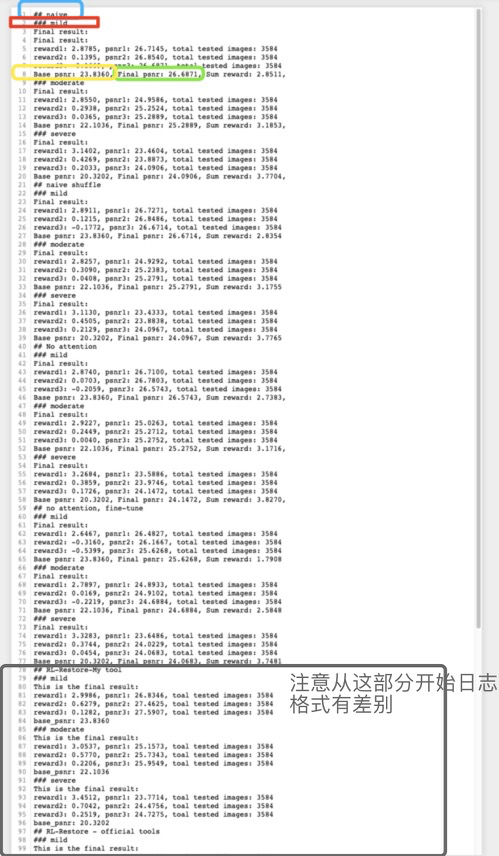
蓝色对应着算法名
红色对应着列名（对应数据集）
绿色是提取的值，黄色是表格的第一行的值，最后输出结果是一个DataFrame表格

In [4]:
columns = ''
df = pandas.DataFrame(columns=['mild','moderate','severe'], index=['base_psnr','method1', 'method2', 'methodn'])
df

,mild,moderate,severe
base_psnr,NaN,NaN,NaN
method1,NaN,NaN,NaN
method2,NaN,NaN,NaN
methodn,NaN,NaN,NaN


In [5]:
import re
index = re.findall('(?:^|\n)#{2}\\s(.*)\n', text)
index.insert(0, "Base psnr")
Base_psnr = [23.8360, 22.1036, 20.3202, None,None,None, None,None,None, None,None,None]
result_reward1 = re.findall(r'reward1:\s(.*?),', text)
result_reward2 = re.findall(r'reward2:\s(.*?),', text)
result_reward3 = re.findall(r'reward3:\s(.*?),', text)
result_psnr = re.findall(r'psnr3:\s(.*?),', text)
data = []
data.append(Base_psnr)
for i in range(0, len(result_psnr), 3):
    data.append([result_psnr[i], result_psnr[i + 1], result_psnr[i + 2],
                result_reward1[i],result_reward2[i],result_reward3[i],
                result_reward1[i+1],result_reward2[i+1],result_reward3[i+1],
                result_reward1[i+2],result_reward2[i+2],result_reward3[i+2],])
df = pandas.DataFrame(data=data, columns=['mild', 'moderate', 'severe',
                                          'mild-r1','mild-r2','mild-r3',
                                          'moderate-r1','moderate-r2','moderate-r3',
                                          'severe-r1','severe-r2','severe-r3'],
                      index=index)
df

,mild,moderate,severe,mild-r1,mild-r2,mild-r3,moderate-r1,moderate-r2,moderate-r3,severe-r1,severe-r2,severe-r3
Base psnr,23.836,22.1036,20.3202,None,None,None,None,None,None,None,None,None
naive,26.6714,25.2791,24.0967,2.8911,0.1215,-0.1772,2.8257,0.3090,0.0408,3.1130,0.4505,0.2129
No attention,26.6613,25.2879,24.1011,2.9071,0.0881,-0.1699,2.8838,0.2670,0.0335,3.1851,0.4011,0.1947
"No attention, fine-tune",25.6268,24.6884,24.0683,2.6467,-0.3160,-0.5399,2.7897,0.0169,-0.2219,3.3283,0.3744,0.0454
Noise layer,26.6728,25.2738,24.1088,2.9031,0.1194,-0.1857,2.8447,0.2957,0.0298,3.1411,0.4418,0.2057
"No attention, Noise layer",26.5896,25.2969,24.1686,2.8135,0.1221,-0.1820,2.9304,0.2492,0.0137,3.2905,0.3770,0.1808
RL-Restore-My tool,27.5907,25.9549,24.7275,2.9986,0.6279,0.1282,3.0537,0.5770,0.2206,3.4512,0.7042,0.2519
RL-Restore - my tools(trained),27.5472,26.0640,24.7842,3.0088,0.6133,0.0892,3.1641,0.6442,0.1521,3.3237,0.9438,0.1965
RL-Restore - official tools,28.0327,26.4542,25.2041,3.2798,0.7854,0.1315,3.3741,0.7767,0.1998,3.6469,0.9534,0.2836


In [6]:
df.to_csv('a.csv')